In [ ]:
the contestant made a choice but before the chosen door was opened, the host, who knew where the most valuable item was,
would open one of the doors not selected and reveal a worthless item.

Write a code that implement this test for 1000 games and determine that following:
    
(a)  What is the probability of improving the selection by switching?

In [25]:
from random import random
N = 1000

def Which_Curtain():
    x = random()
    if 0 <= x <= (1/3):
        Curtain_Right = 1
    elif (1/3) <= x <= (2/3):
        Curtain_Right = 2
    else:
        Curtain_Right = 3
    return(Curtain_Right)



def I_Chose():
    y = random()
    if 0 <= y <= (1/3):
        Curtain_Chosen = 1
    elif (1/3) <= y <= (2/3):
        Curtain_Chosen = 2
    else:
        Curtain_Chosen = 3
    return(Curtain_Chosen)


def Wrong_Opened(I_Chose, Which_Curtain):
    if I_Chose == 1:
        if Which_Curtain == 1:
            z = random()
            if 0 <= z <= (.5):
                Worthless = 2
            else:
                Worthless = 3
        elif Which_Curtain == 2:
            Worthless = 3
        else:
            Worthless = 2
    elif I_Chose == 2:
        if Which_Curtain == 1:
            Worthless = 3
        elif Which_Curtain == 2:
            z = random()
            if 0 <= z <= (.5):
                Worthless = 1
            else:
                Worthless = 3
        else:
            Worthless = 1
    else:
        if Which_Curtain == 3:
            z = random()
            if 0 <= z <= (.5):
                Worthless = 1
            else:
                Worthless = 2
        elif Which_Curtain == 2:
            Worthless = 1
        else:
            Worthless = 2
    return(Worthless)


Win = 0
def Dont_Switch():
    q = I_Chose()
    w = Which_Curtain()
    Win = 0
    if q == w:
        Win = 1
    else:
        Win = 0
    return(Win)

def Switch(): #Decides whether to add 1 to Win or nah
    I_Chose()
    Which_Curtain()
    Win = 0
    if I_Chose() == 1:
        if Which_Curtain() == 2:
            Win = 1
        elif Which_Curtain() == 3:
            Win = 1
        else:
            Win = 0
    elif I_Chose() == 2:
        if Which_Curtain() == 3:
            Win = 1
        elif Which_Curtain() == 1:
            Win = 1
        else:
            Win = 0
    elif I_Chose() == 3:
        if Which_Curtain() == 1:
            Win = 1
        elif Which_Curtain() == 2:
            Win = 1
        else:
            Win = 0
    return(Win)

Addds = 0
Adds = 0
for _ in range(N):
    k = Dont_Switch()
    if(k == 1):
        Addds = Addds + 1
    if(k == 0):
        Addds = Addds
Win_Percent_ds = (Addds / N)*100


for _ in range(N):
    k = Switch()
    if(k == 1):
        Adds = Adds + 1
    if(k == 0):
        Adds = Adds
Win_Percent_s = (Adds / N)*100
print(str(Win_Percent_s) + "% win percentage when I switch")
print(str(Win_Percent_ds) + "% win percentage when I dont switch")

    
    


#wins/(number of games) when switch
#wins/(number of games) when dont switch
    

41.3% win percentage when I switch
33.4% win percentage when I dont switch


In [ ]:
Starting with a sample consisting of 10 000 atoms of 213Bi, 
simulate the decay of the atoms as in Example 10.1 by dividing time into slices of 
length dt= 1 s each

In [ ]:
a) For  each  atom  of 209Pb  in  turn,  decide  at  random,  with  the  appropriate  probability, whether it decays or not. 
    
    (The probability can be calculated from p(t) = 1-2^(t/Tao), where Tao is the half life)

Count the total number that decay,  subtract it from the number of 209Pb atoms, and add it to the number of 209Bi atoms.

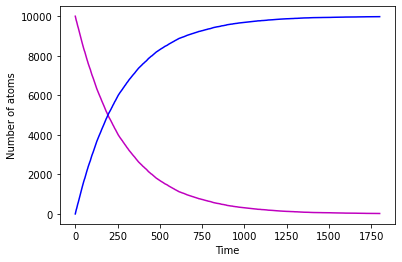

In [100]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show
N_209_Pb = 10000          # Initial Number of Lead atoms
N_209_Bi = 0               # Number of Bismuth atoms
tau = 3.3*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 60*30           # Total Time is 30 minutes

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Tlpoints = [] # empty array to strore # of Tl atoms at each time step
Pbpoints = [] # empty array to strore # of Pb atoms at each time step

# Main loop
for t in tpoints:    # for time 0-1000 sec
    Tlpoints.append(N_209_Pb) # append starting # of Tl atoms
    Pbpoints.append(N_209_Bi) # append starting # of Pb atoms

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(N_209_Pb): # determine number of atoms that decay
        x = random()
        if x < p:
            decay += 1
    N_209_Pb -= decay # subtract number of decayed Parent atoms 
    N_209_Bi += decay # add number of decayed Daughter atoms 

# Make the graph
plot(tpoints,Tlpoints, c='m') # plot Tl vs. time
plot(tpoints,Pbpoints, c='b') # plot Pb vs. time
xlabel("Time")
ylabel("Number of atoms")
show()


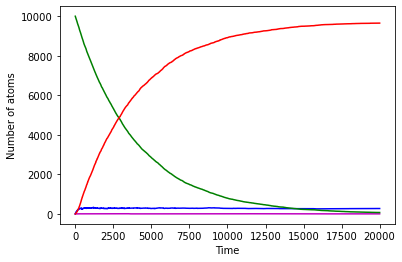

9652 is amount atoms of 209 Bi Made
72 is amount atoms of 213 Bi left
3 is amount atoms of 209 Tl left
273 is amount atoms of 209 Pb left
10000 is still the total amount of atoms we are working with


In [116]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show
N_213_Bi = 10000           # Initial Number of 209-Bismuth atoms
N_209_Tl = 0               # Initial Number of Thallium atoms
N_209_Pb = 0               # Initial Number of Lead atoms
N_209_Bi = 0               # Initial Number of 213-Bismuth atoms
Tau_Pb = 3.3*60            # Half life of lead in seconds
Tau_Tl = 2.2*60            # Half life of Thallium in seconds
Tau_Bi = 46*60             # Half life of Bismuth in seconds
h = 1.0                    # Size of time-step in seconds
pBi = 1 - 2**(-h/Tau_Bi)   # Probability of decay of Bi in one step
pTl = 1 - 2**(-h/Tau_Tl)   # Probability of decay of Tl in one step
pPb = 1 - 2**(-h/Tau_Pb)   # Probability of decay of Pb in one step
tmax = 20000               # max time is 20000 seconds

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Tlpoints = []                # empty array to strore # of Tl atoms at each time step
Pbpoints = []                # empty array to strore # of Pb atoms at each time step
iBi_points = []              # empty array to strore # of 213 Bi atoms at each time step
fBi_points = []              # empty array to strore # of 209 Bi atoms at each time step

for t in tpoints:               # for time 0-1000 sec
    Pbpoints.append(N_209_Pb)   # append starting # of Pb atoms
    Tlpoints.append(N_209_Tl)   # append starting # of Tl atoms
    iBi_points.append(N_213_Bi) # append starting # of 213 Bi atoms
    fBi_points.append(N_209_Bi) # append starting # of 209 Bi atoms
    
    decayBiTl = 0
    decayBiPb = 0
    decayTl = 0
    decayPb = 0
    for i in range(0,N_213_Bi): # determine number of atoms that decay
        x = random()
        if x < pBi:                           # subtract number of decayed Parent atoms 
            w = random()
            if w <= .0209:                # 2.09% of the time, decay into Thallium
                decayBiTl += 1
            elif w > .0209:               # the rest of the time, decay into Lead
                decayBiPb += 1
            for j in range(0,N_209_Tl):       # determine number of Tl atoms that decay
                y = random()
                if y < pTl:
                    decayTl += 1
            for k in range(0,N_209_Pb):   # determine number of Pb atoms that decay
                z = random()
                if z < pPb:
                    decayPb += 1
    N_213_Bi -= decayBiPb
    N_213_Bi -= decayBiTl     #213 Bismuth always loses
    N_209_Pb += decayBiPb     #209 lead gains from decayed 213 Bismuth
    N_209_Tl += decayBiTl     #OR 209 Thallium gains from decayed 213 Bismuth
    N_209_Tl -= decayTl
    N_209_Pb += decayTl       #Thallium turns to lead(subtract Thallium and add lead)
    N_209_Pb -= decayPb                              
    N_209_Bi += decayPb       #Lead turns to 209 Bismuth(subtract Lead and add Bismuth)     

plot(tpoints,Tlpoints, c='m')   # plot Tl vs. time
plot(tpoints,Pbpoints, c='b')   # plot Pb vs. time
plot(tpoints,iBi_points, c='g') #plot 213 Bi vs time
plot(tpoints,fBi_points, c="r")  #plot 209 Bi vs time
xlabel("Time")
ylabel("Number of atoms")
show()
total = N_213_Bi + N_209_Bi + N_209_Tl + N_209_Pb
print(str(N_209_Bi) + " is amount atoms of 209 Bi Made")
print(str(N_213_Bi) + " is amount atoms of 213 Bi left")
print(str(N_209_Tl) + " is amount atoms of 209 Tl left")
print(str(N_209_Pb) + " is amount atoms of 209 Pb left")
print(str(total) + " is still the total amount of atoms we are working with")
